In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("data/vulpi")
norlab_dir = Path("data/borealtc")
vterrains = {f.stem: f for f in data_dir.iterdir() if f.is_dir()}
nterrains = {f.stem: f for f in norlab_dir.iterdir() if f.is_dir()}
del nterrains["MIXED"]
terrains = {**vterrains, **nterrains}

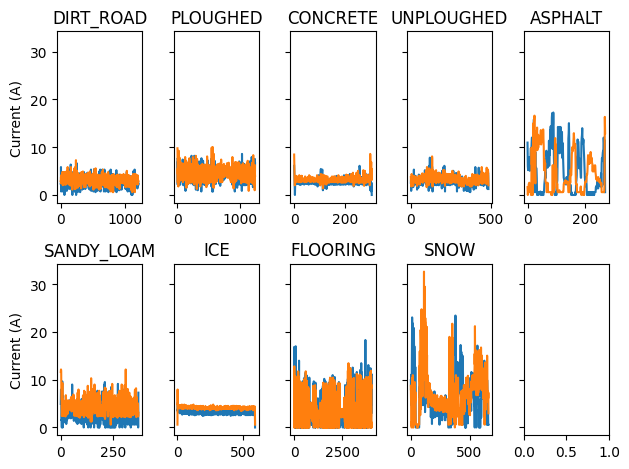

In [9]:
fig, subfigs = plt.subplots(nrows=2, ncols=len(terrains) // 2 + 1, sharey=True)

for ax, (terr, terrdir) in zip(subfigs.flatten(), terrains.items()):
    imu_path = [*terrdir.glob("imu_06.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_06.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    pro_df.curL.plot(ax=ax, label="Left")
    pro_df.curR.plot(ax=ax, label="Right")
    ax.set_title(terr)
    ax.set_ylabel("Current (A)")

fig.tight_layout()

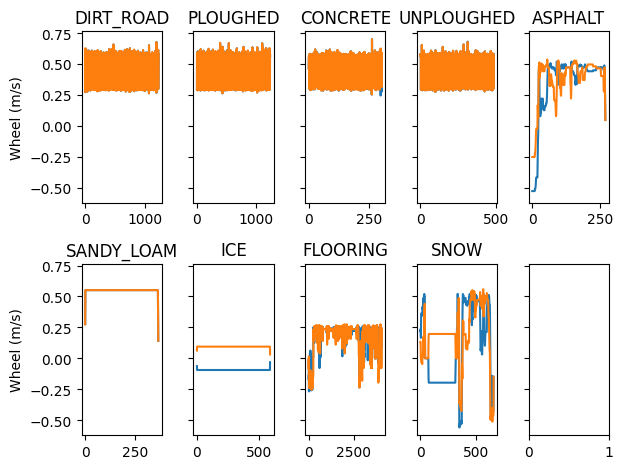

In [8]:
from utils.constants import HuskyConstants


fig, subfigs = plt.subplots(nrows=2, ncols=len(terrains) // 2 + 1, sharey=True)

for ax, (terr, terrdir) in zip(subfigs.flatten(), terrains.items()):
    imu_path = [*terrdir.glob("imu_06.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_06.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    pro_df.velL.plot(ax=ax, label="Left")
    pro_df.velR.plot(ax=ax, label="Right")
    ax.set_title(terr)
    ax.set_ylabel("Wheel (m/s)")

fig.tight_layout()

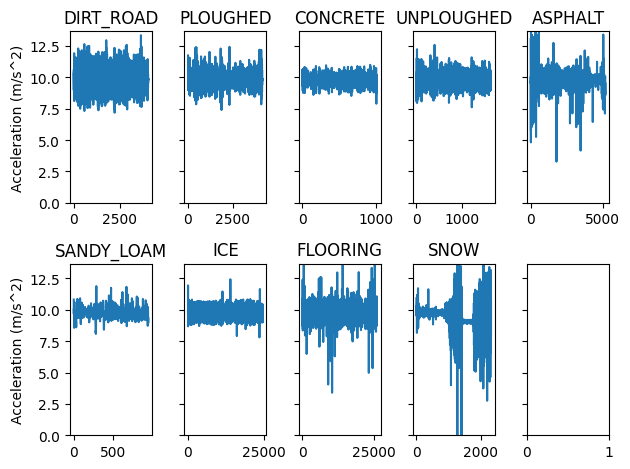

In [7]:
fig, subfigs = plt.subplots(nrows=2, ncols=len(terrains) // 2 + 1, sharey=True)

for ax, (terr, terrdir) in zip(subfigs.flatten(), terrains.items()):
    imu_path = [*terrdir.glob("imu_00.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_00.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    imu_df.az.plot(ax=ax)
    ax.set_title(terr)
    ax.set_ylabel("Acceleration (m/s^2)")

    ax.set_ylim(bottom=0)

fig.tight_layout()

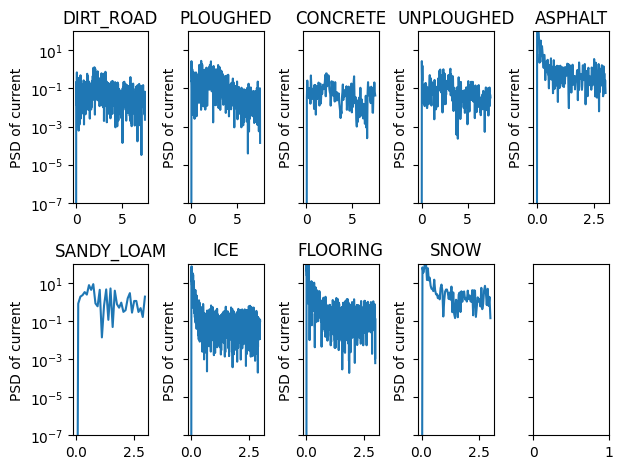

In [23]:
from scipy import signal as sig


fig, subfigs = plt.subplots(nrows=2, ncols=len(terrains) // 2 + 1, sharey=True)

for ax, (terr, terrdir) in zip(subfigs.flatten(), terrains.items()):
    imu_path = [*terrdir.glob("imu_00.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_00.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    sf = int(1 / imu_df.time.diff().min())

    f, PSD = sig.periodogram(imu_df.az, fs=sf)

    ax.semilogy(f, PSD)

    ax.set_title(terr)
    ax.set_ylim([1e-7, 1e2])
    ax.set_ylabel("PSD of acceleration")


fig.tight_layout()

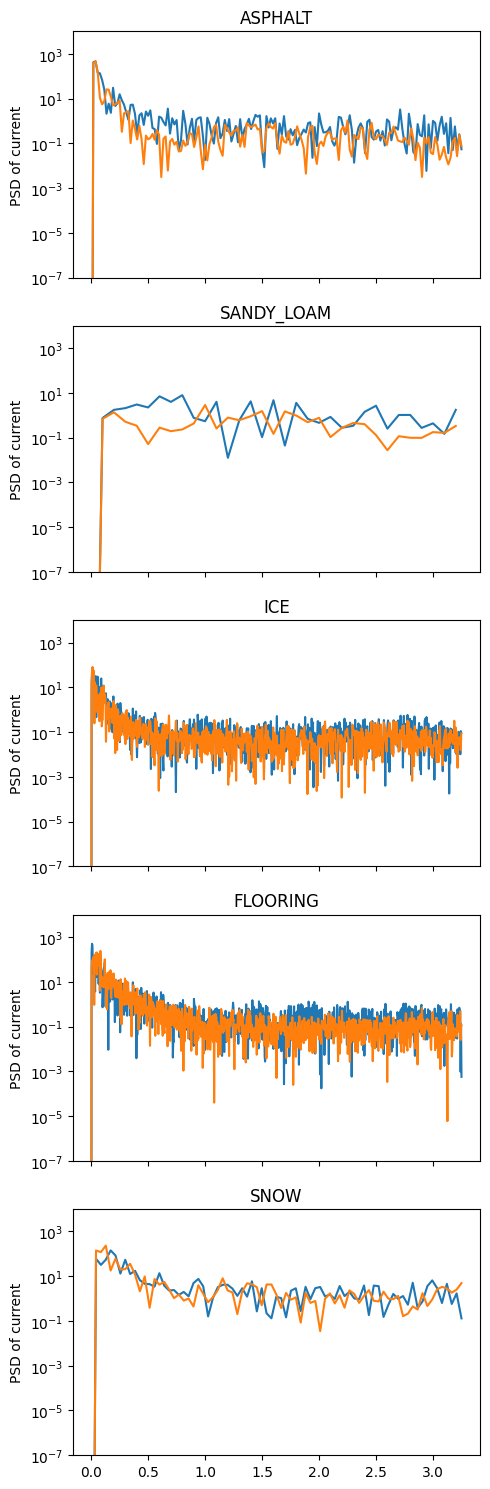

In [27]:
from scipy import signal as sig


fig, subfigs = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(5, 15))

for ax, (terr, terrdir) in zip(subfigs.flatten(), nterrains.items()):
    imu_path = [*terrdir.glob("imu_00.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_00.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    sf = round(1 / pro_df.time.diff().min(), 1)

    f, PSD = sig.periodogram(pro_df.curL, fs=sf)
    ax.semilogy(f, PSD, label="Left")
    f, PSD = sig.periodogram(pro_df.curR, fs=sf)
    ax.semilogy(f, PSD, label="Right")

    ax.set_title(terr)
    ax.set_ylim([1e-7, 1e4])
    ax.set_ylabel("PSD of current")
fig.tight_layout()

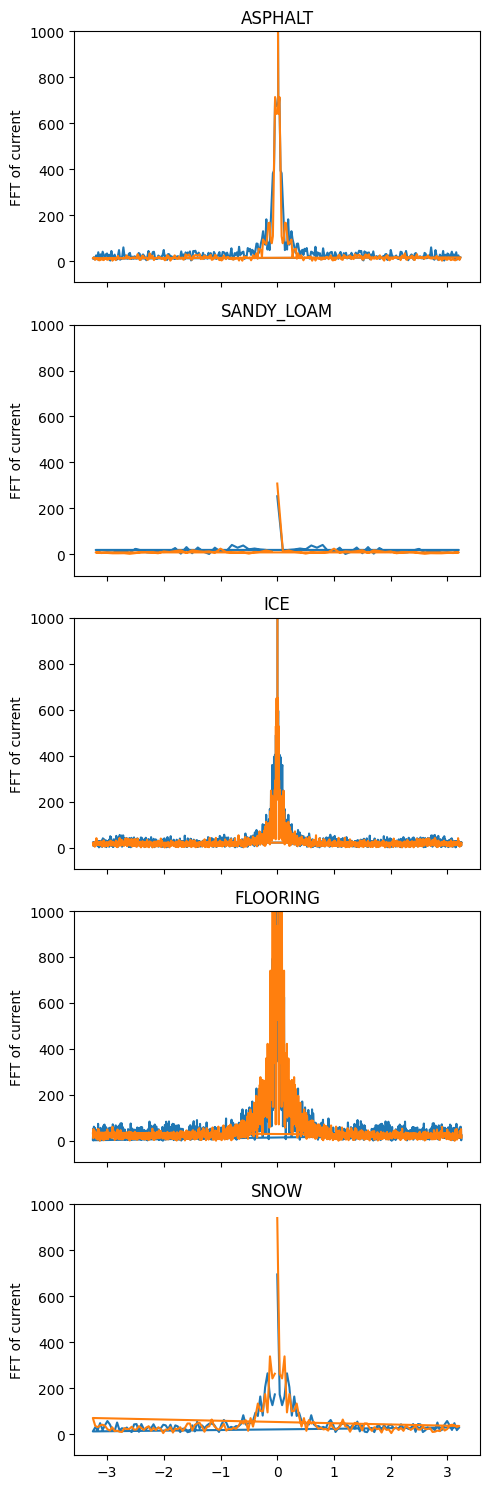

In [33]:
from scipy import fft
import numpy as np

fig, subfigs = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(5, 15))

for ax, (terr, terrdir) in zip(subfigs.flatten(), nterrains.items()):
    imu_path = [*terrdir.glob("imu_00.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_00.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    sf = round(1 / pro_df.time.diff().min(), 1)
    N = len(pro_df.index)

    yf = fft.fft(pro_df.curL.to_numpy())
    xf = fft.fftfreq(N, 1 / sf)
    ax.plot(xf, np.abs(yf), label="Left")
    yf = fft.fft(pro_df.curR.to_numpy())
    xf = fft.fftfreq(N, 1 / sf)
    ax.plot(xf, np.abs(yf), label="Right")

    ax.set_ylim(top=1000)

    ax.set_title(terr)
    ax.set_ylabel("FFT of current")
fig.tight_layout()

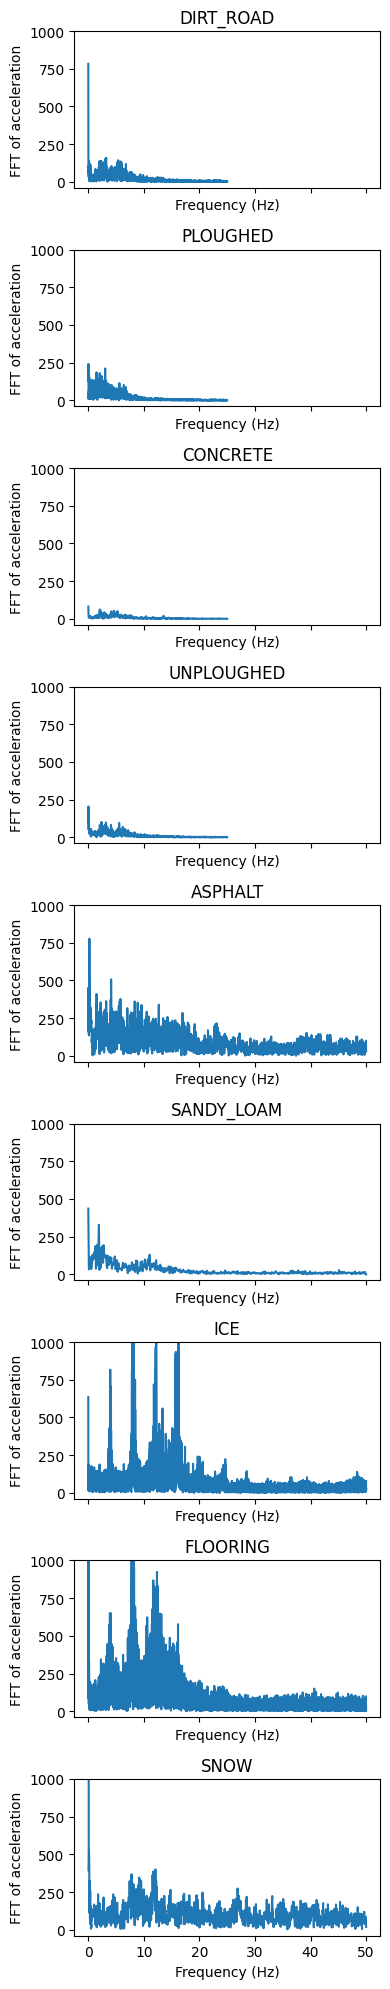

In [37]:
from scipy import fft
import numpy as np

fig, subfigs = plt.subplots(nrows=9, sharex=True, sharey=True, figsize=(4, 20))

for ax, (terr, terrdir) in zip(subfigs.flatten(), terrains.items()):
    imu_path = [*terrdir.glob("imu_00.csv"), *terrdir.glob("imu_1.csv")][0]
    pro_path = [*terrdir.glob("pro_00.csv"), *terrdir.glob("pro_1.csv")][0]
    imu_df = pd.read_csv(imu_path)
    pro_df = pd.read_csv(pro_path)

    sf = round(1 / imu_df.time.diff().min(), 1)
    N = len(imu_df.index)

    yf = fft.rfft(imu_df.ax.to_numpy())
    xf = fft.rfftfreq(N, 1 / sf)
    ax.plot(xf, np.abs(yf), label="Left")

    ax.set_ylim(top=1000)

    ax.set_title(terr)
    ax.set_ylabel("FFT of acceleration")
    ax.set_xlabel("Frequency (Hz)")
fig.tight_layout()